In [1]:
from Proximity import Proximity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [2]:
files = files = ['1000.xlsx','1001.xlsx','1002.xlsx','1003.xlsx','1004.xlsx','1005.xlsx',
         '1006.xlsx','1007.xlsx','1008.xlsx','1009.xlsx']
path = '~/GIT/collinearity/database/sidis/expdata/'
for F in files:
    if F == '1000.xlsx':
        data = pd.read_excel(path + F)
    else:
        data = pd.concat([data,pd.read_excel(path + F)],ignore_index=True,sort = True)

data.reset_index(inplace=True,drop=True) # Gets rid of any gaps in index and is crucial for this notebook



In [3]:
N = 1000
p = 1
domain1 = [0.05,0.8]
domain2 = [0.05,0.8]
domainPhi = [0,2*np.pi]

data = Proximity(data,domain1,domain2,domainPhi,p,N)

#for i in range(len(data)):
#    if data.loc[i,'proximity'] > 0 and data.loc[i,'proximity'] < 1:
#        print(data.loc[i,'proximity'])


/home/scott/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/scott/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


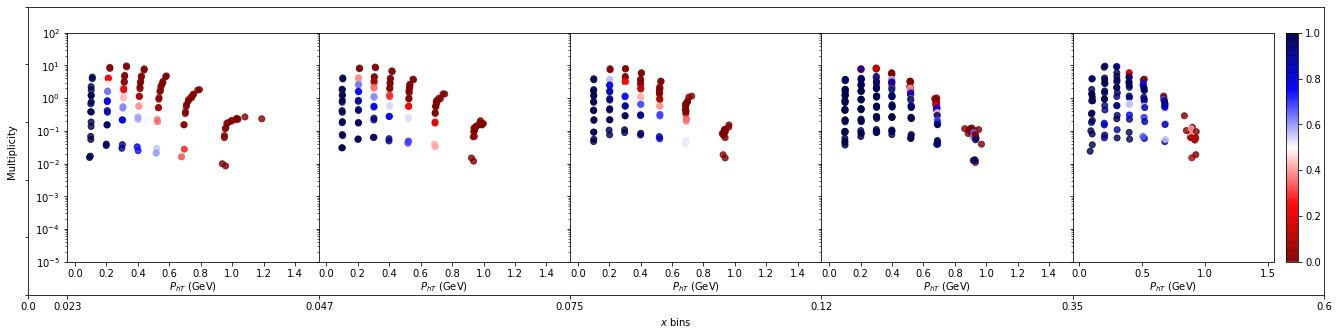

In [4]:
####################
# Hermes pi+ Plot  #
####################  

dat = data.query("col == 'hermes' and hadron == 'pi+'")
dat.reset_index(inplace=True,drop=True) # Gets rid of any gaps in index and is crucial for this notebook

xBin = np.array([0.023,0.047,0.075,0.12,0.35,0.6]) # Bins for x used to plot Pt
Q2Bin = np.array([1.0,10]) # **NOTE** includes all Q2 data, therefore all value data is plotted vs. Pt
zBin = np.array([0.1, 0.2,0.25,0.3, 0.375, 0.475, 0.6, 0.8, 1.1]) # catagories for z to be plotted individually 
                                                                 # in each subplot
Phperp = np.array([ 0.0, 0.15, 0.25, 0.35, 0.45, 0.6, 0.8, 1.2]) 

# Binning data
dat.loc[:,'xBin'] = pd.cut(dat.loc[:,'x'], xBin,labels = False, retbins=0)
dat.loc[:,'Q2Bin'] = pd.cut(dat.loc[:,'Q2'], Q2Bin,labels = False, retbins=0)
dat.loc[:,'zBin'] = pd.cut(dat.loc[:,'z'], zBin,labels = False, retbins=0)

# Bins for x and y that have non-empty intersection
pTdat = [0,1,2,3,4] # xBins that overlap Q2Bins
valuedat = [0] # Q2bins that overlap xBins
 
# Initialize the figure
fig1 = plt.figure(figsize=(18, 4),facecolor="white") 
globalGrid = gridspec.GridSpec(1, 1,left=0.03,right=1,top=.91,bottom=.115, 
                             wspace=0.0, hspace=0.0) # plot for subplot matrix as 1x1 matrix
innerGrid = gridspec.GridSpecFromSubplotSpec(1,5, subplot_spec=globalGrid[0], 
                             wspace=0.0, hspace=0.0) # 1X5 subplot grid 

# Figure properties
ax = fig1.add_axes([0,0,1,1]) 
ax.xaxis.set_ticks([0,.3,2.245,4.18,6.12,8.06,10 ])
xticklabels = np.array([0,0.023,0.047,0.075,0.12,0.35,0.6]) 
ax.set_yticklabels("")
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"$x$ bins") 
ax.set_ylabel(r"Multiplicity")
#cmap = reverse_colourmap(cmap=plt.get_cmap('seismic'), name = 'my_cmap_r')
cmap=plt.get_cmap('seismic_r')

for f,F in zip(range(len(pTdat)),pTdat):       
    for j,J in zip(range(len(valuedat)),valuedat):
        
        ax = fig1.add_subplot(innerGrid[f]) # add subplot in innerGrid
        
        for z in range(len(zBin)-1): 
           
            databin = dat.loc[dat['xBin'].isin([F]) & dat['Q2Bin'].isin([J]) & dat["zBin"].isin([z])]
            
            if f != 0:
               
                ax.scatter(databin['pT'],databin['value'], c=databin['proximity'],
                           cmap=cmap, alpha=0.8)
                ax.set_xlim([-0.05,1.55])
                ax.set_ylim([10**(-5),10**2])
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_yscale('log')
                ax.set_yticklabels('')
               
            else:
              
                plot = ax.scatter(databin['pT'],databin['value'], c=databin['proximity'], 
                                  cmap=cmap, alpha=0.8)
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_xlim([-0.05,1.55])
                ax.set_ylim([10**(-5),10**2])
                ax.set_yscale('log')
                
fig1.colorbar(plot)
plt.show()
#plt.savefig('HERMES_pi+_proximity.png', bbox_inches = "tight")
#dat.to_excel('HERMES_pi+_proximity.xlsx')


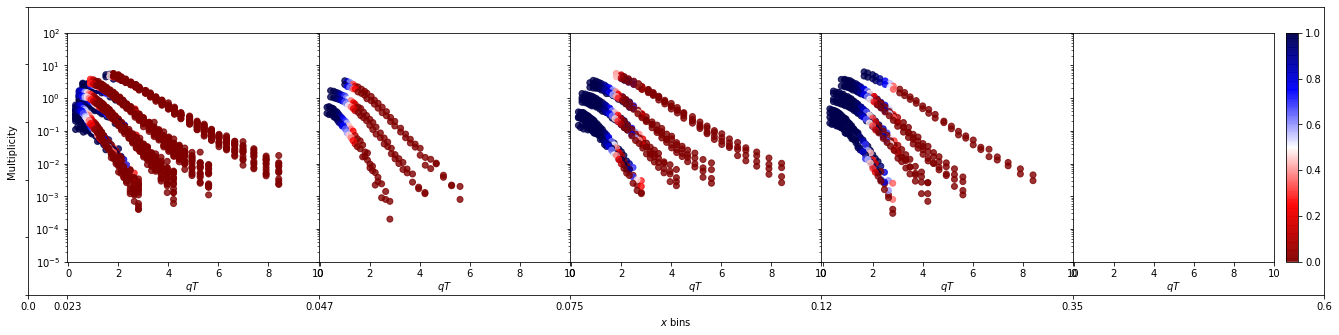

In [5]:
################
# Compass Plot #
################
dat = data.query("col == 'compass'")
dat.reset_index(inplace=True,drop=True)

dat.loc[:,'qT'] = dat.loc[:,'pT']/dat.loc[:,'z']
xBin = np.array([0.023,0.047,0.075,0.12,0.35,0.6]) # Bins for x used to plot Pt
Q2Bin = np.array([1.0,10]) # **NOTE** includes all Q2 data, therefore all value data is plotted vs. Pt
zBin = np.array([0.1, 0.2,0.25,0.3, 0.375, 0.475, 0.6, 0.8, 1.1]) # catagories for z to be plotted individually 
                                                                 # in each subplot
Phperp = np.array([ 0.0, 0.15, 0.25, 0.35, 0.45, 0.6, 0.8, 1.2]) 

# Binning data
dat.loc[:,'xBin'] = pd.cut(dat.loc[:,'x'], xBin,labels = False, retbins=0)
dat.loc[:,'Q2Bin'] = pd.cut(dat.loc[:,'Q2'], Q2Bin,labels = False, retbins=0)
dat.loc[:,'zBin'] = pd.cut(dat.loc[:,'z'], zBin,labels = False, retbins=0)

# Bins for x and y that have non-empty intersection
pTdat = [0,1,2,3,4] # xBins that overlap Q2Bins
valuedat = [0] # Q2bins that overlap xBins
 
# Initialize the figure
fig2 = plt.figure(figsize=(18, 4),facecolor="white") 
globalGrid = gridspec.GridSpec(1, 1,left=0.03,right=1,top=.91,bottom=.115, 
                             wspace=0.0, hspace=0.0) # plot for subplot matrix as 1x1 matrix
innerGrid = gridspec.GridSpecFromSubplotSpec(1,5, subplot_spec=globalGrid[0], 
                             wspace=0.0, hspace=0.0) # 1X5 subplot grid 

# Figure properties
ax = fig2.add_axes([0,0,1,1]) 
ax.xaxis.set_ticks([0,.3,2.245,4.18,6.12,8.06,10 ])
xticklabels = np.array([0,0.023,0.047,0.075,0.12,0.35,0.6]) 
ax.set_yticklabels("")
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"$x$ bins") 
ax.set_ylabel(r"Multiplicity")
#cmap = reverse_colourmap(cmap=plt.get_cmap('seismic'), name = 'my_cmap_r')
cmap=plt.get_cmap('seismic_r')

for f,F in zip(range(len(pTdat)),pTdat):       
    for j,J in zip(range(len(valuedat)),valuedat):
        
        ax = fig2.add_subplot(innerGrid[f]) # add subplot in innerGrid
        
        for z in range(len(zBin)-1): 
           
            databin = dat[dat['xBin'].isin([F]) & dat['Q2Bin'].isin([J]) & dat["zBin"].isin([z])]
            
            if f != 0:
               
                ax.scatter(databin['qT'],databin['value'], c=databin['proximity'],
                           cmap=cmap, alpha=0.8)
                ax.set_xlim([-0.05,10.0])                
                ax.set_ylim([10**(-5),10**2])
                ax.set_xlabel(r"$qT$",labelpad=1)
                ax.set_yscale('log')
                ax.set_yticklabels('')
               
            else:
              
                plot = ax.scatter(databin['qT'],databin['value'], c=databin['proximity'], 
                                  cmap=cmap, alpha=0.8)
                ax.set_xlabel(r"$qT$",labelpad=1)
                ax.set_xlim([-0.05,10.0])
                ax.set_ylim([10**(-5),10**2])
                ax.set_yscale('log')
                
fig2.colorbar(plot)
plt.show()